## World Happiness Report

### Data Description

The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy. the reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

#### What is Dystopia?

Dystopia is an imaginary country that has the world’s least-happy people. The purpose in establishing Dystopia is to have a benchmark against which all countries can be favorably compared (no country performs more poorly than Dystopia) in terms of each of the six key variables, thus allowing each sub-bar to be of positive width.

#### What are the residuals?

The residuals, or unexplained components, differ for each country, reflecting the extent to which the six variables either over- or under-explain average life evaluations. These residuals have an average value of approximately zero over the whole set of countries. 

### Target

1. Cover all the columns like Happiness Rank, Happiness Score, Standard error, Economy, Family,Freedom, Trust,Generosity and Dystopia residuals to generate the report.
2. To Find the Dystopia Residual(The Dystopia Residual metric actually is the Dystopia Happiness Score(1.85) + the Residual value or the unexplained value for each country).
3. Predict the happiness score considering all the other factors mentioned in the dataset. 

### Important Observations From the Data Description:-

You can find the dataset in the link below:
    
https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv

https://github.com/dsrscientist/DSData

### Python libraries

The libraries for this kernel are:

• Numpy

• Pandas

• Seaborn

• Matplotlib

• Graphviz

• Scikit-Learn

### Importing Required Libraries

In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading the dataset

In [15]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv")

In [16]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [17]:
df.head(5)

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [18]:
nRowsRead = 1000 # specify 'None' if want to read whole file
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv', delimiter=',', nrows = nRowsRead)
df.dataframeName = 'https://github.com/dsrscientist/DSData/blob/master/happiness_score_dataset.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 158 rows and 12 columns


In [19]:
pd.set_option("display.max_rows",None)

In [20]:
df

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Finland,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Netherlands,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Sweden,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [21]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [22]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

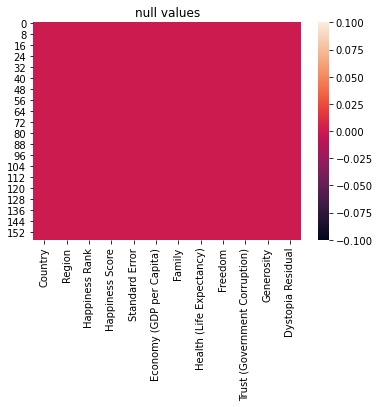

In [23]:
sns.heatmap(df.isnull())
plt.title("null values")
plt.show()

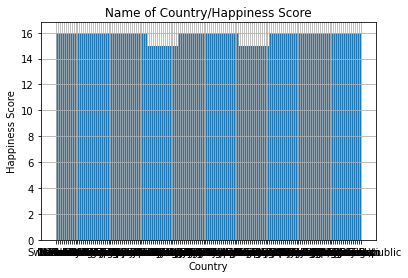

In [24]:
df["Country"].hist(grid = True)
plt.xlabel("Country")
plt.ylabel("Happiness Score")
plt.title('Name of Country/Happiness Score');
plt.show()

In [25]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df["Country"]=LE.fit_transform(df["Country"])
df["Country"].value_counts()

0      1
108    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
109    1
99     1
110    1
111    1
112    1
113    1
114    1
115    1
116    1
100    1
98     1
118    1
88     1
81     1
82     1
83     1
84     1
85     1
86     1
87     1
89     1
97     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
117    1
119    1
1      1
148    1
141    1
142    1
143    1
144    1
145    1
146    1
147    1
149    1
139    1
150    1
151    1
152    1
153    1
154    1
155    1
156    1
140    1
138    1
120    1
128    1
121    1
122    1
123    1
124    1
125    1
126    1
127    1
129    1
137    1
130    1
131    1
132    1
133    1
134    1
135    1
136    1
80     1
79     1
78     1
29     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
30     1
20     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
21     1
19     1
77     1
9      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
10     1
18     1
1

In [26]:
LE.inverse_transform([1,2])

array(['Albania', 'Algeria'], dtype=object)

Checking Correlation

In [27]:
df.corr()

,Country,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Country,1.000000,-0.098538,0.083380,0.033879,0.037808,0.159416,0.037829,0.085684,0.088155,0.118085,-0.019778
Happiness Rank,-0.098538,1.000000,-0.992105,0.158516,-0.785267,-0.733644,-0.735613,-0.556886,-0.372315,-0.160142,-0.521999
Happiness Score,0.083380,-0.992105,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,0.033879,0.158516,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.037808,-0.785267,0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.159416,-0.733644,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.037829,-0.735613,0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.085684,-0.556886,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.088155,-0.372315,0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.118085,-0.160142,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301


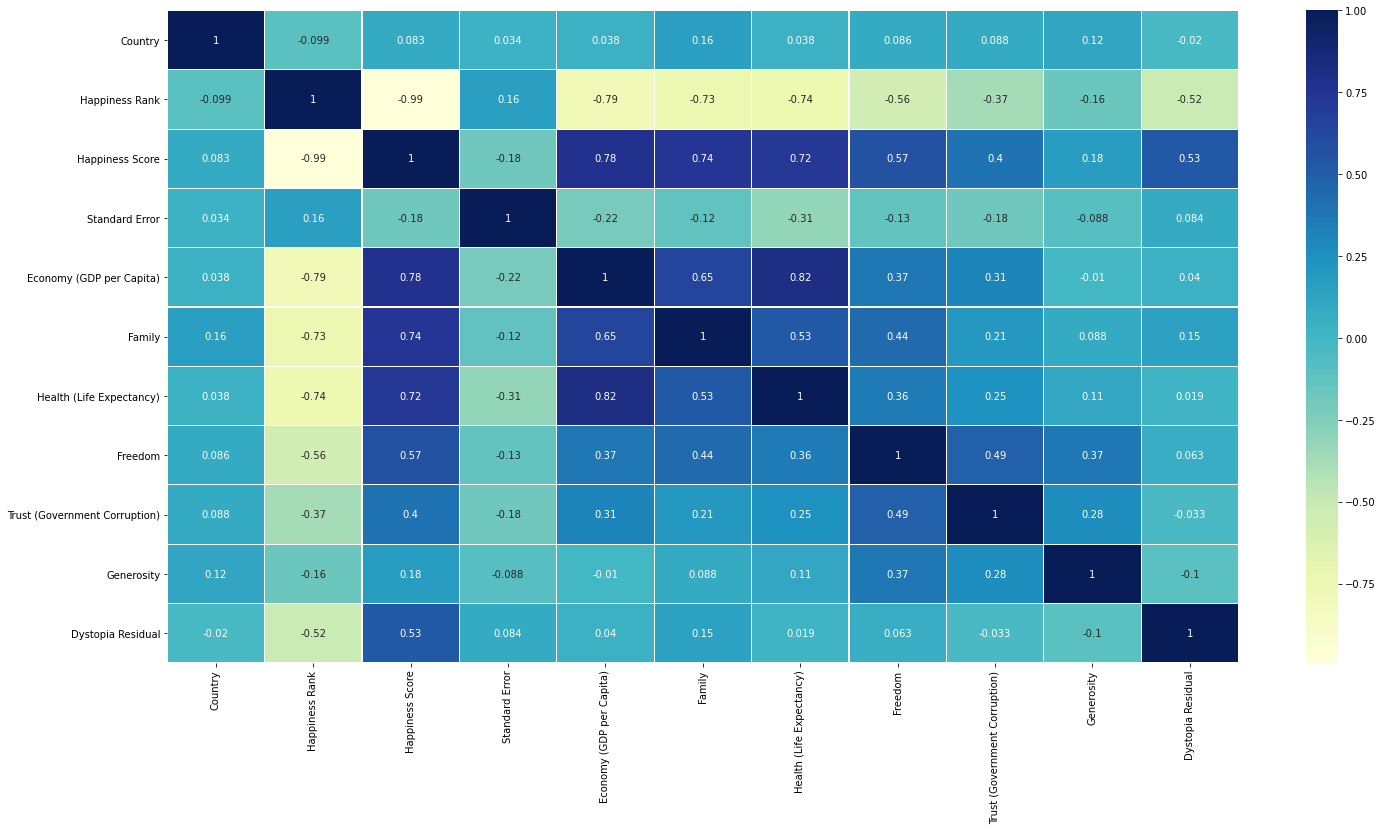

In [28]:
plt.figure(figsize=(24,12))
sns.heatmap(df.corr(),linewidths=.1,cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

In [29]:
df[['Country', 'Happiness Score']].groupby(['Happiness Score'], as_index=False).mean().sort_values(by='Country', ascending=False)

,Happiness Score,Country
43,4.610,157.0
73,5.129,156.0
22,4.077,155.0
82,5.360,154.0
134,6.810,153.0
113,6.003,152.0
125,6.485,151.0
142,7.119,150.0
136,6.867,149.0
137,6.901,148.0


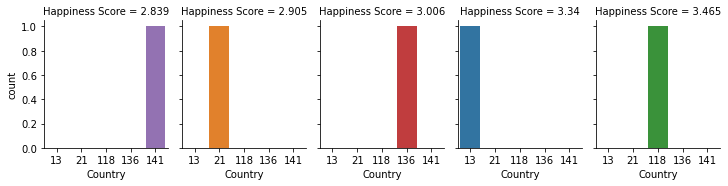

In [30]:
new_var=df[['Country', 'Happiness Score']]
new_var=new_var[new_var['Happiness Score']<=3.5]
sns.factorplot('Country', col='Happiness Score', data=new_var, kind='count', size=2.5, aspect=.8, col_wrap=5);

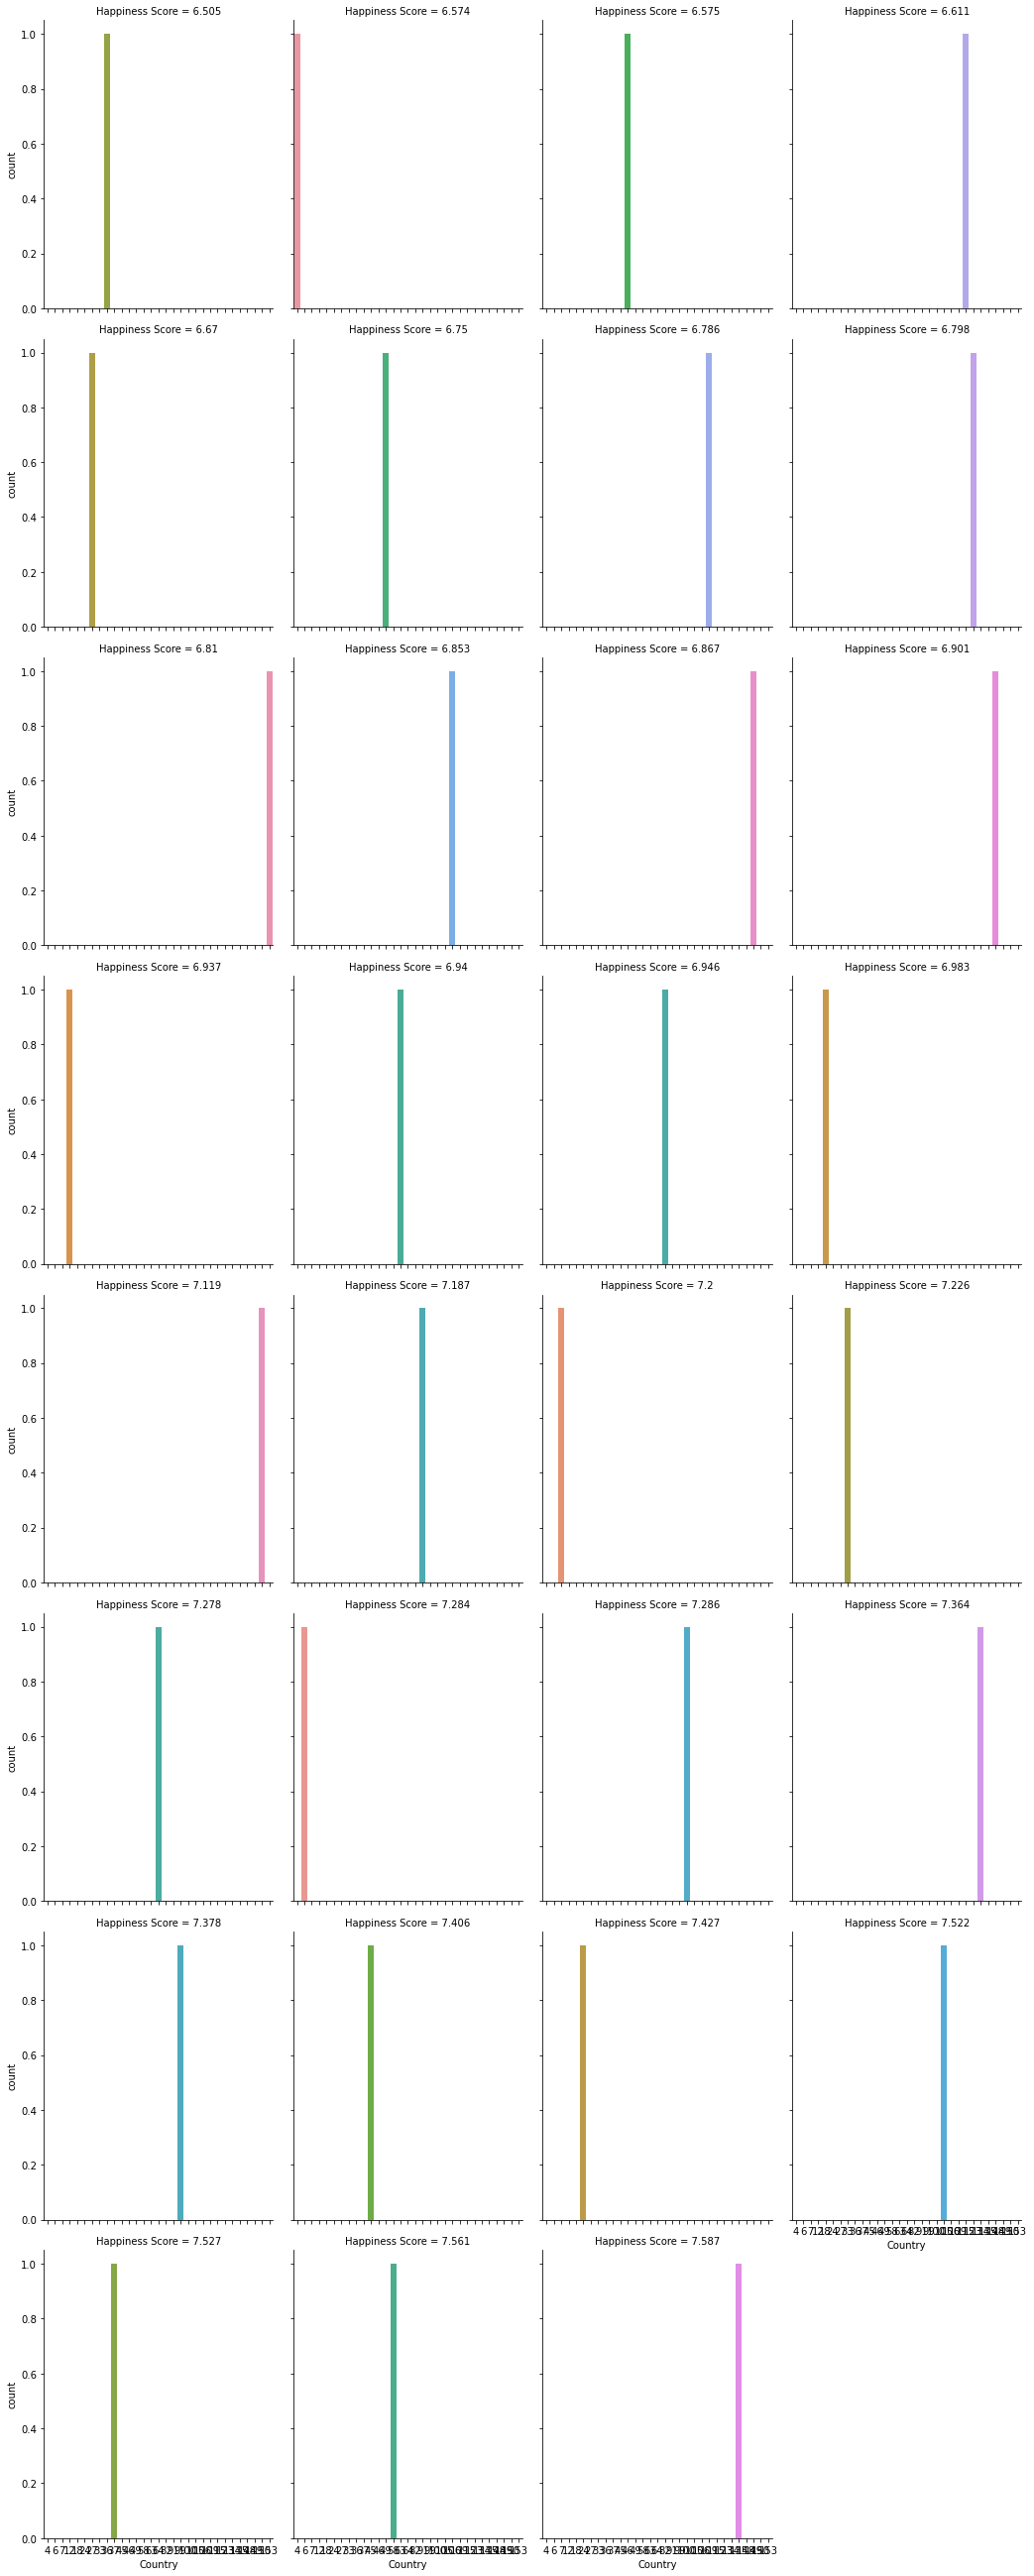

In [31]:
new_var=df[['Country', 'Happiness Score']]
new_var=new_var[new_var['Happiness Score']>6.5]

sns.factorplot('Country', col='Happiness Score', data=new_var, kind='count', size=4.5, aspect=.8, col_wrap=4);

### Lets check the data distribution among all columns

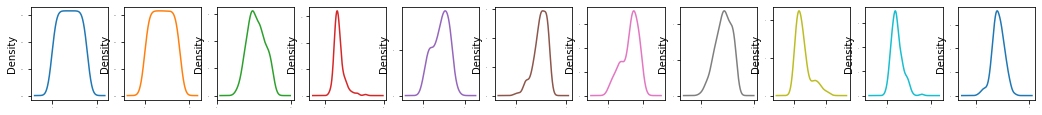

In [32]:
df.plot(kind='density',subplots = True, layout = (6,11),sharex= False, legend = False,fontsize=1, figsize= (18,12))
plt.show()

Model Visualization, Predict and Estimate the Result

In [33]:
x = df.drop("Country", axis=1)
y = df["Country"]

In [34]:
x

,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
5,Western Europe,6,7.406,0.03140,1.29025,1.31826,0.88911,0.64169,0.41372,0.23351,2.61955
6,Western Europe,7,7.378,0.02799,1.32944,1.28017,0.89284,0.61576,0.31814,0.47610,2.46570
7,Western Europe,8,7.364,0.03157,1.33171,1.28907,0.91087,0.65980,0.43844,0.36262,2.37119
8,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


In [35]:
df['Happiness Score'].fillna(df['Happiness Score'].mode()[0], inplace=True)

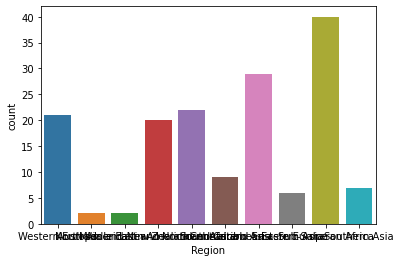

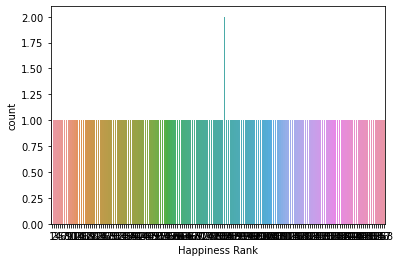

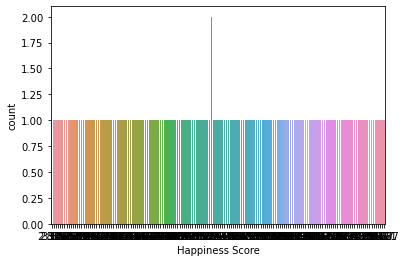

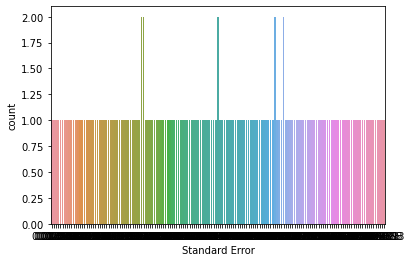

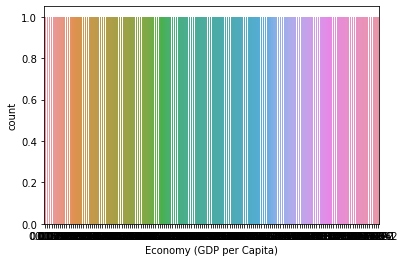

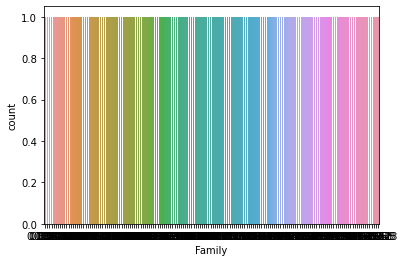

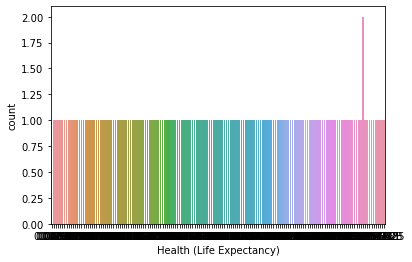

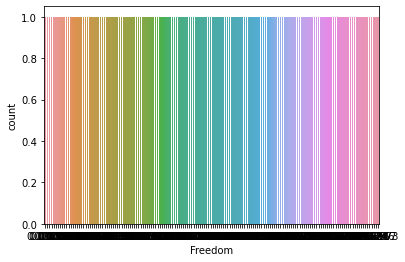

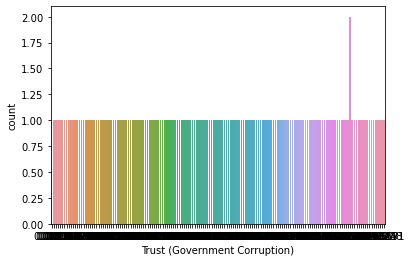

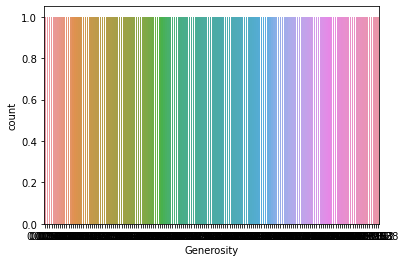

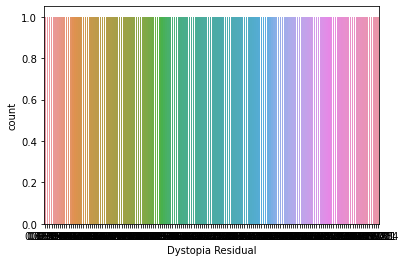

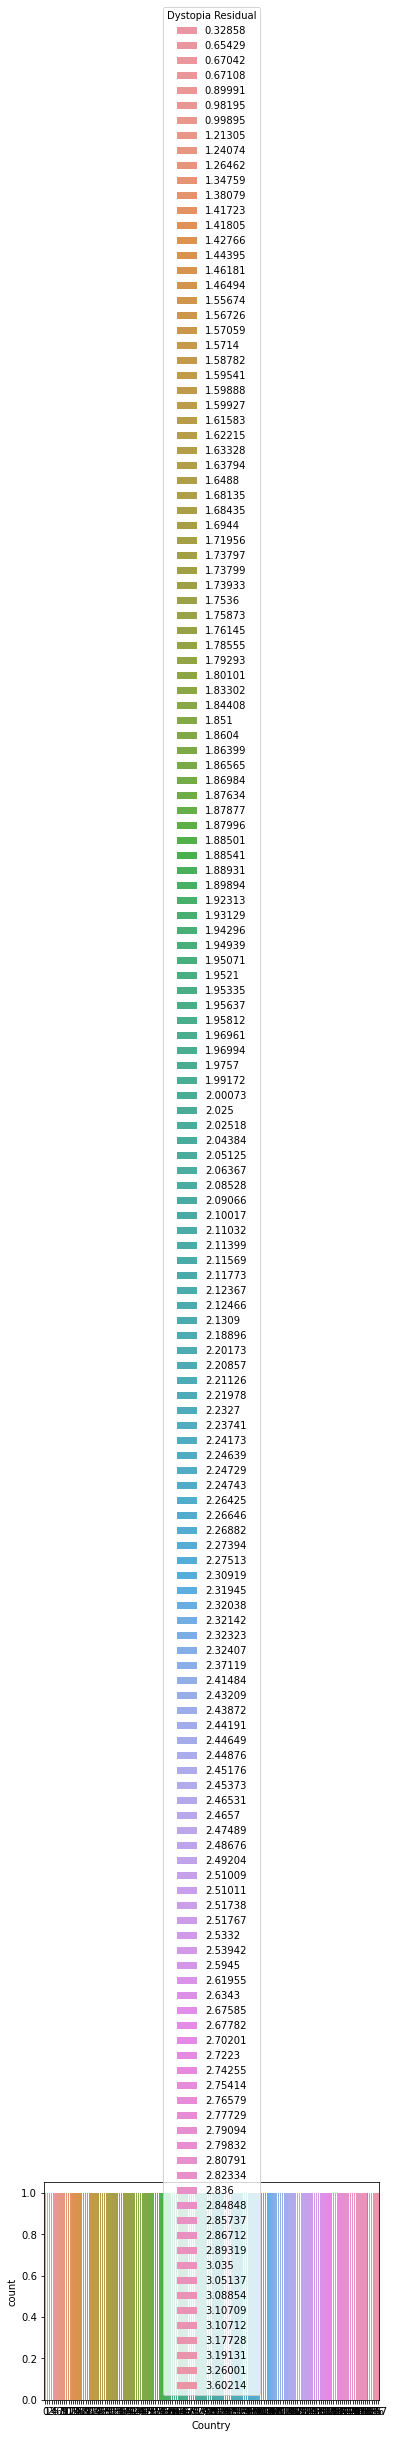

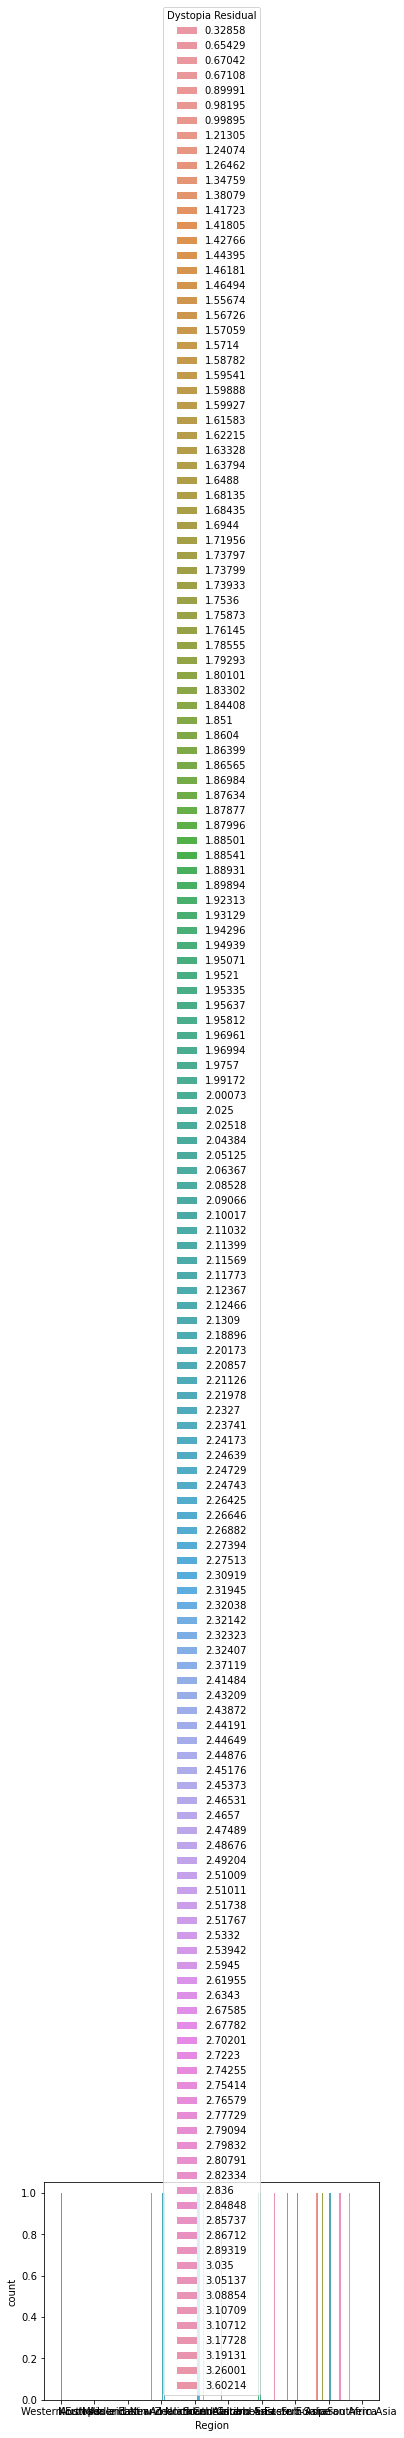

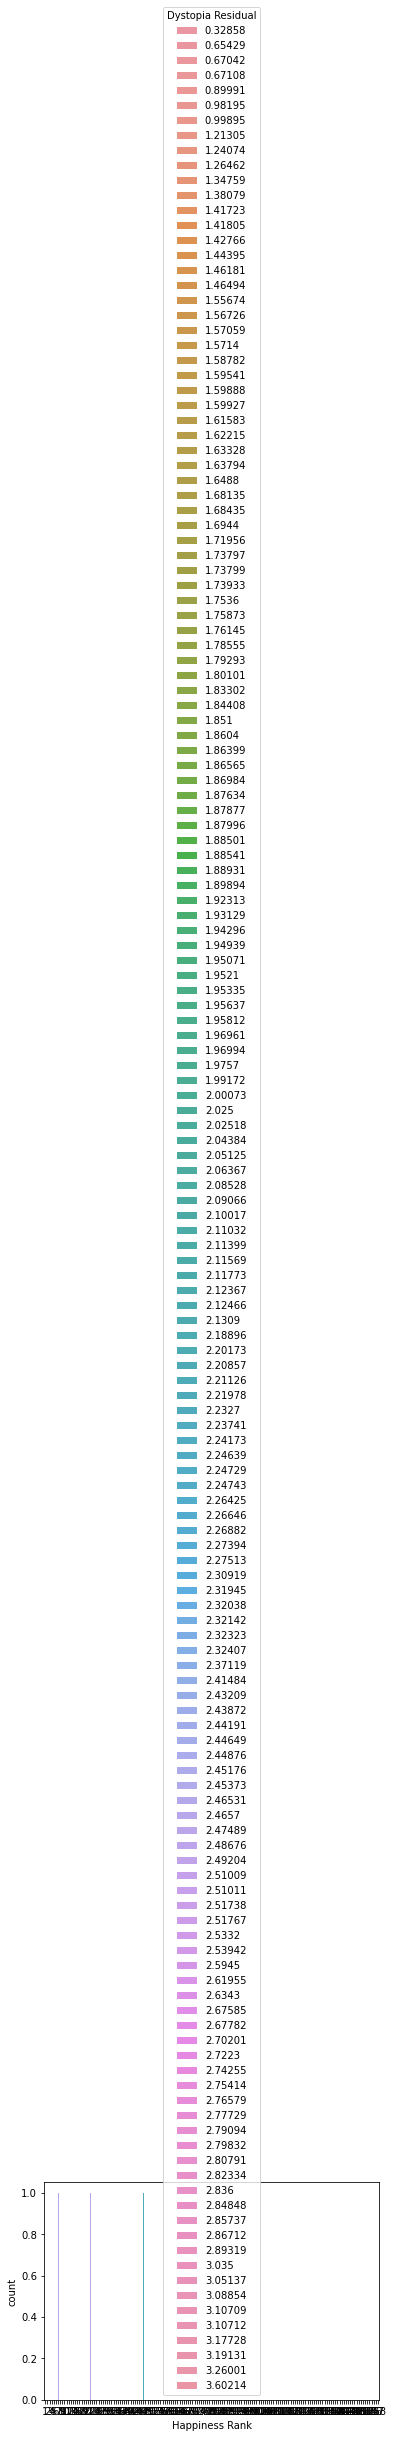

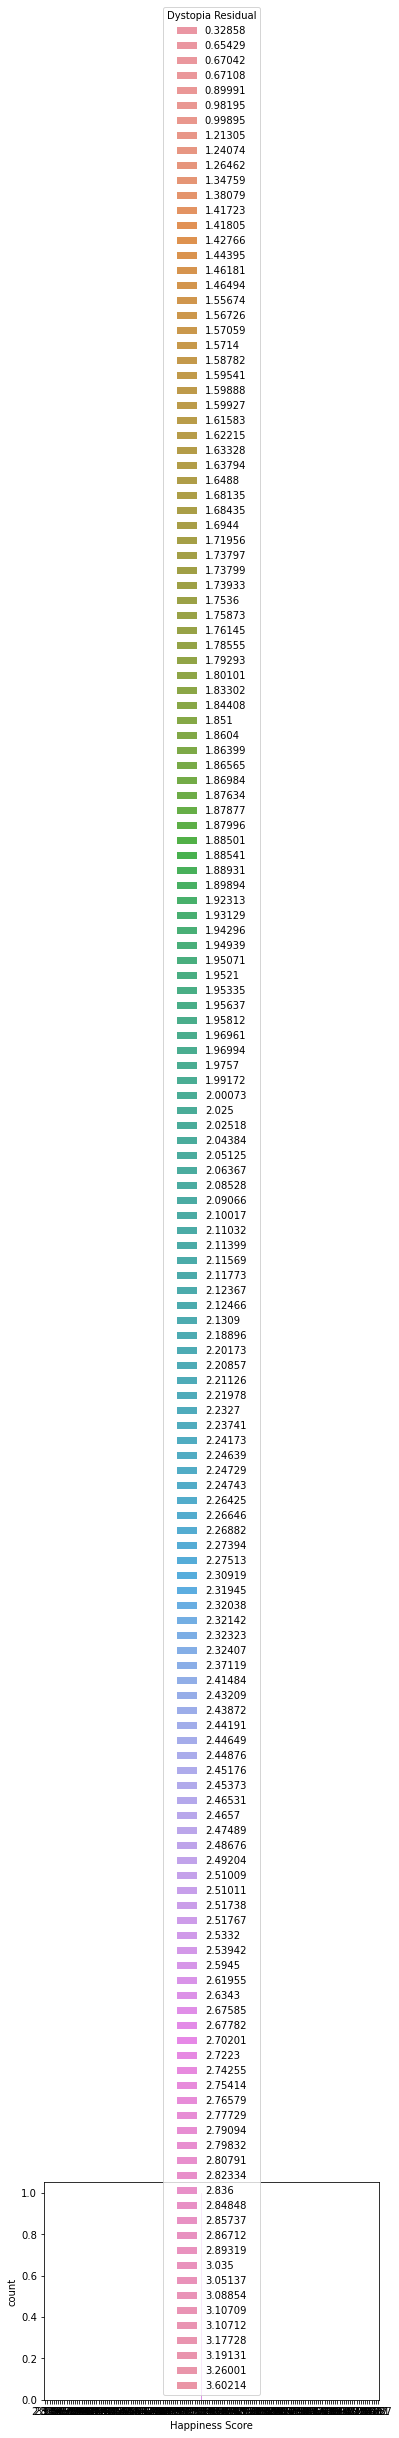

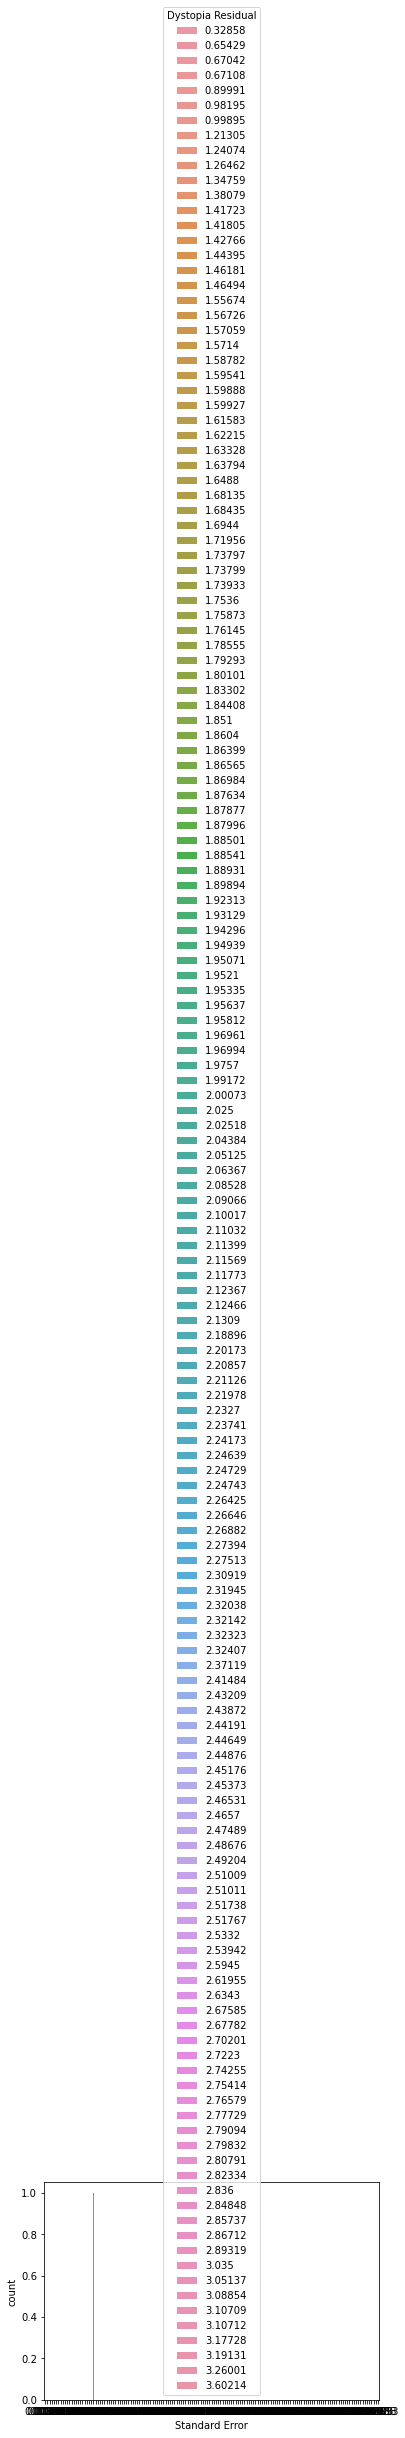

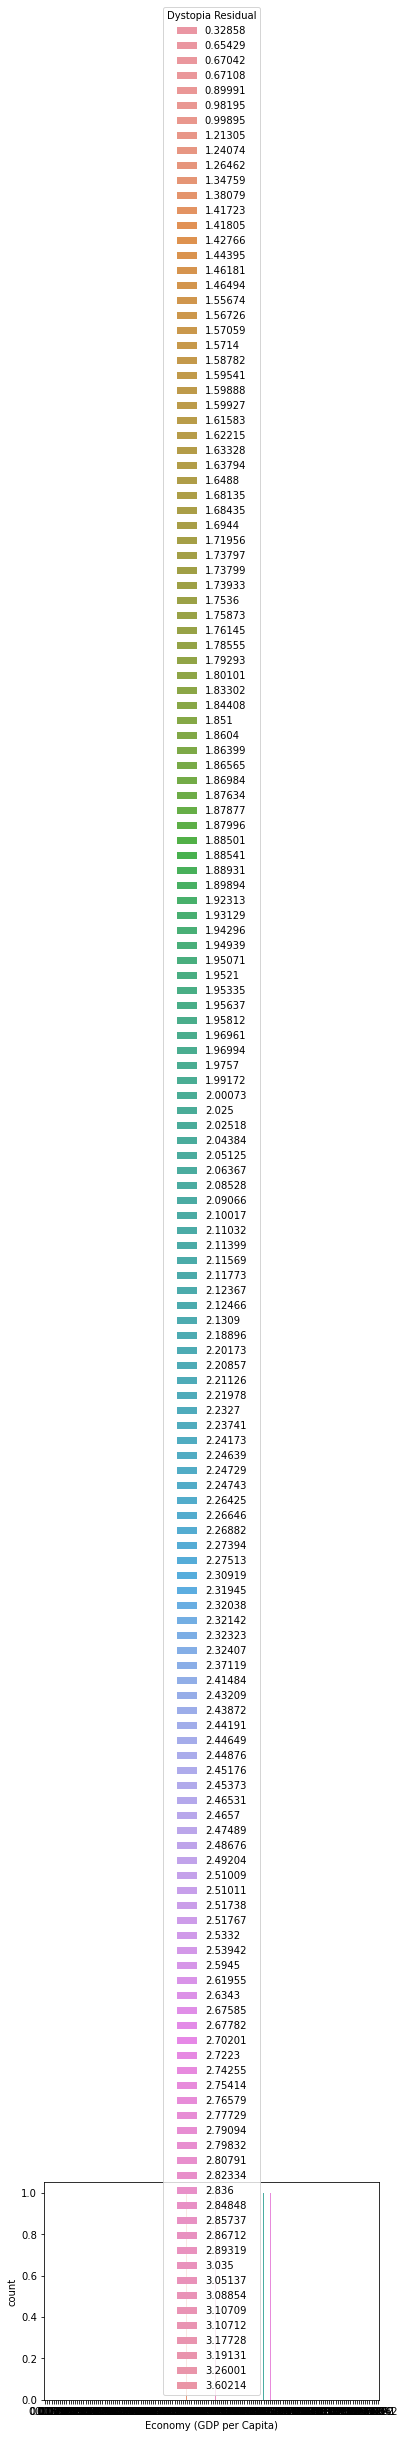

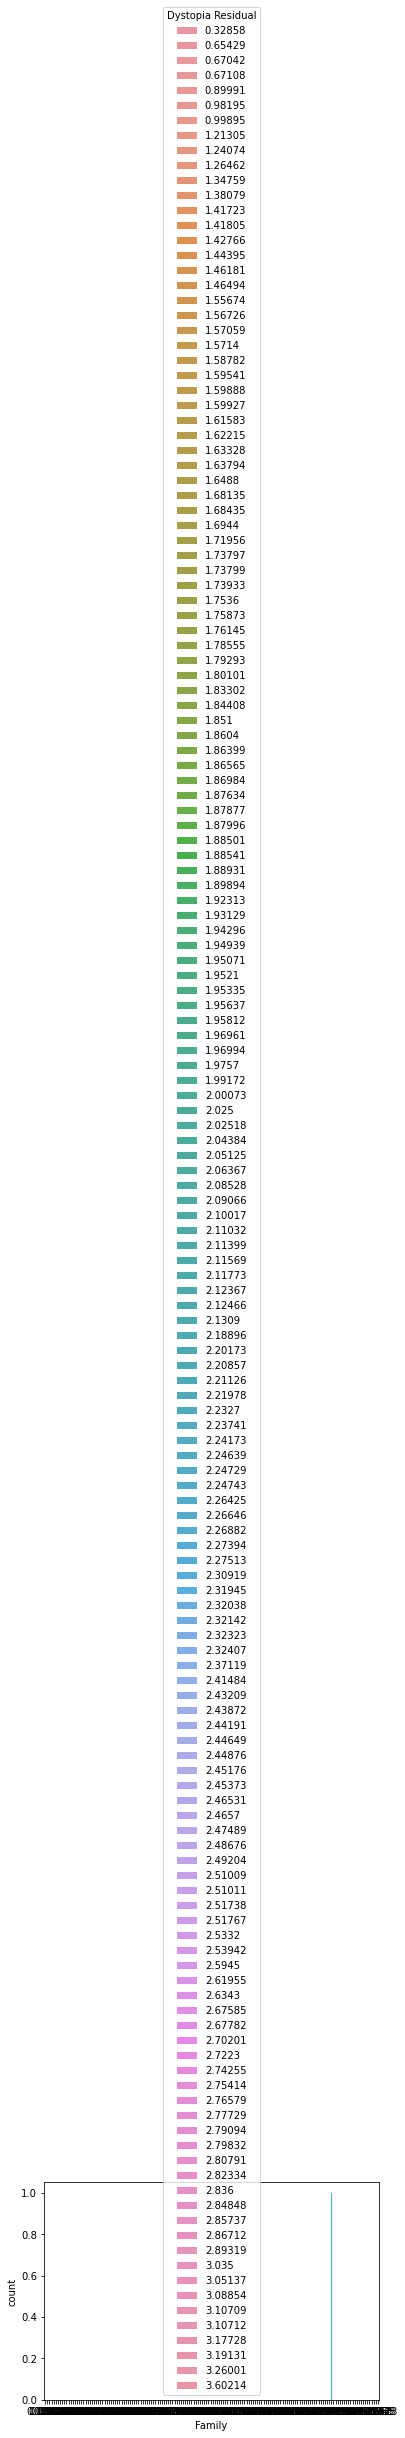

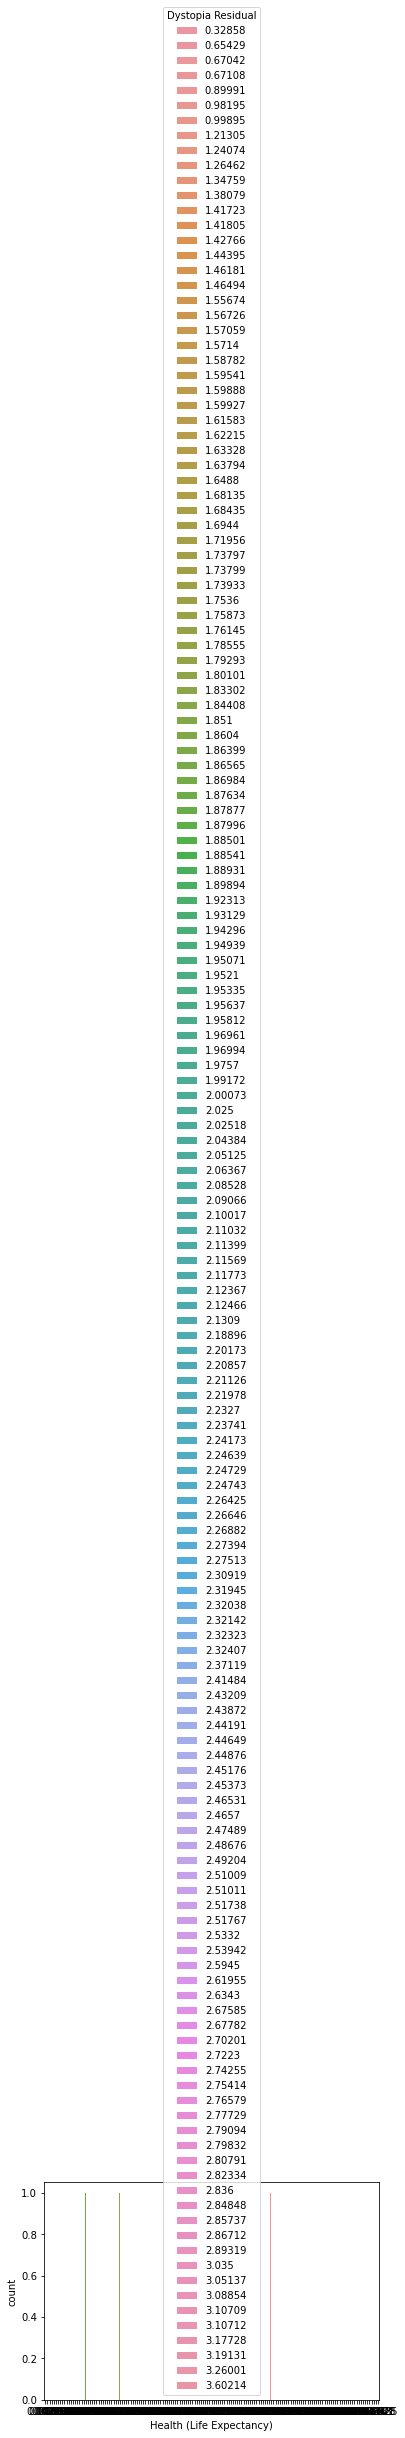

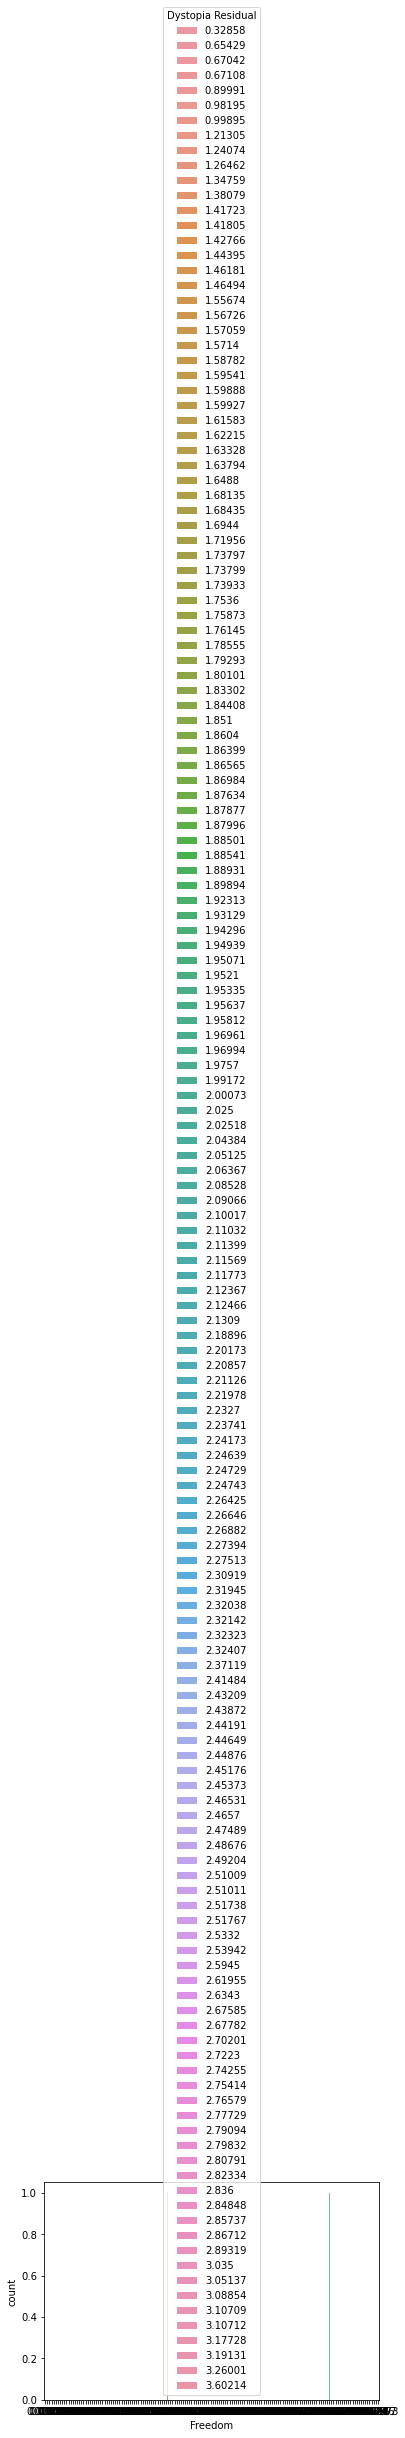

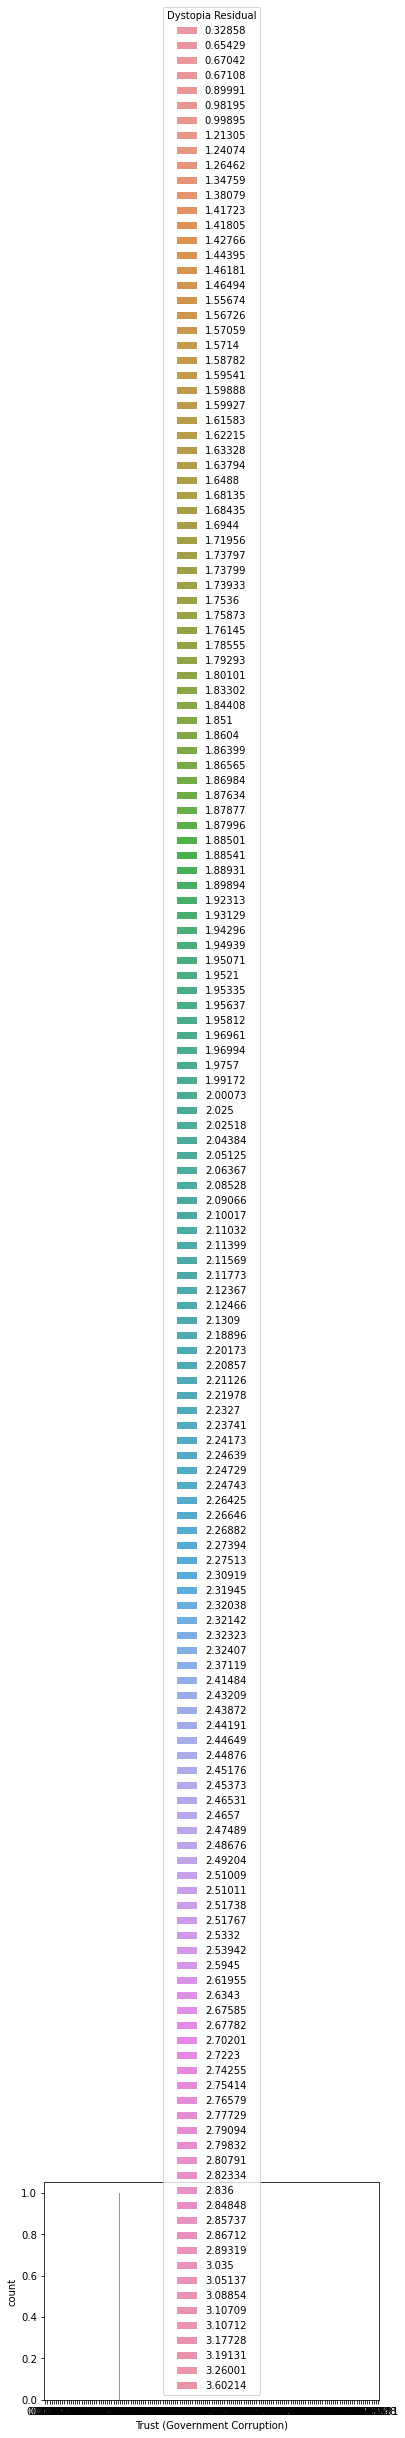

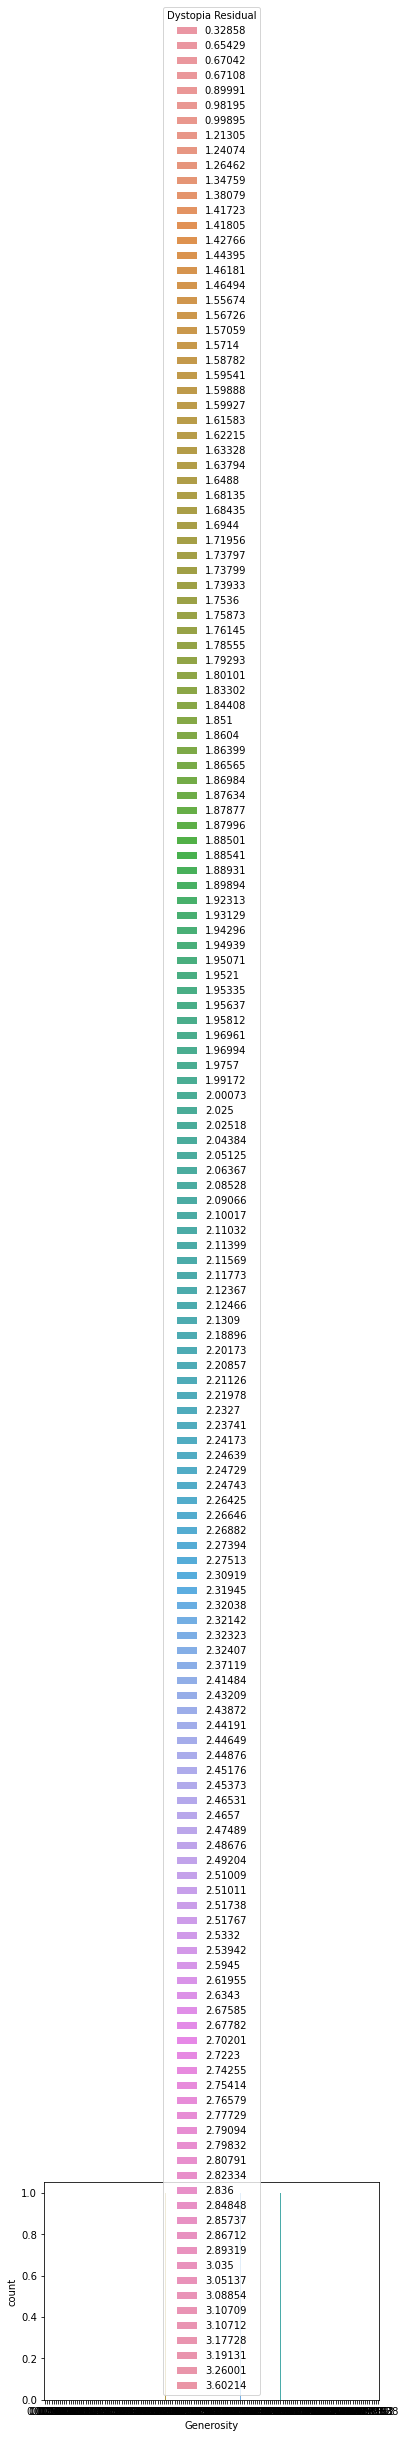

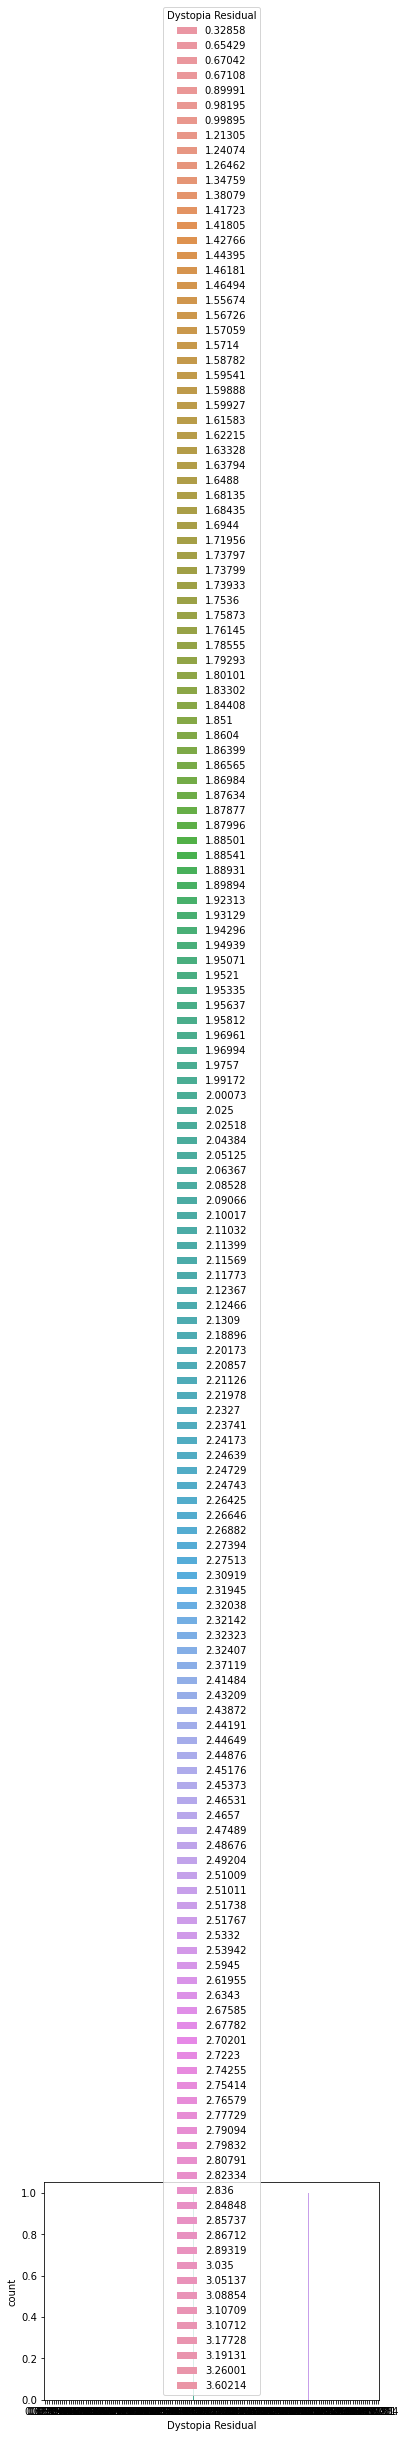

In [42]:
# Model Visualisation
# countplot of every variable
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, data=df)
    sns_plot.figure.savefig("{} countplot.png".format(col))

for i, col in enumerate(df.columns):
    plt.figure(i)
    sns_plot = sns.countplot(x=col, hue='Dystopia Residual', data=df)
    sns_plot.figure.savefig("{} Dystopia Residual countplot.png".format(col))
    plt.show()

Splitting the independent and target variables in x and y before removing the skewness

In [55]:
x.skew().sort_values()

Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Economy (GDP per Capita)        -0.317575
Dystopia Residual               -0.238911
Happiness Rank                   0.000418
Happiness Score                  0.097769
Generosity                       1.001961
Trust (Government Corruption)    1.385463
Standard Error                   1.983439
dtype: float64

In [51]:
x.skew().sort_values(ascending = False)

Standard Error                   1.983439
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Happiness Score                  0.097769
Happiness Rank                   0.000418
Dystopia Residual               -0.238911
Economy (GDP per Capita)        -0.317575
Freedom                         -0.413462
Health (Life Expectancy)        -0.705328
Family                          -1.006893
dtype: float64

In [52]:
np.abs(25)

25

In [53]:
sk= x.skew()
sk[np.abs(sk)>0.25].all()

True

In [54]:
np.abs(-25)

25

In [49]:
x.skew()[np.abs(x.skew())<0.25].all()

True

Skewness has been removed

### Checking Outliers

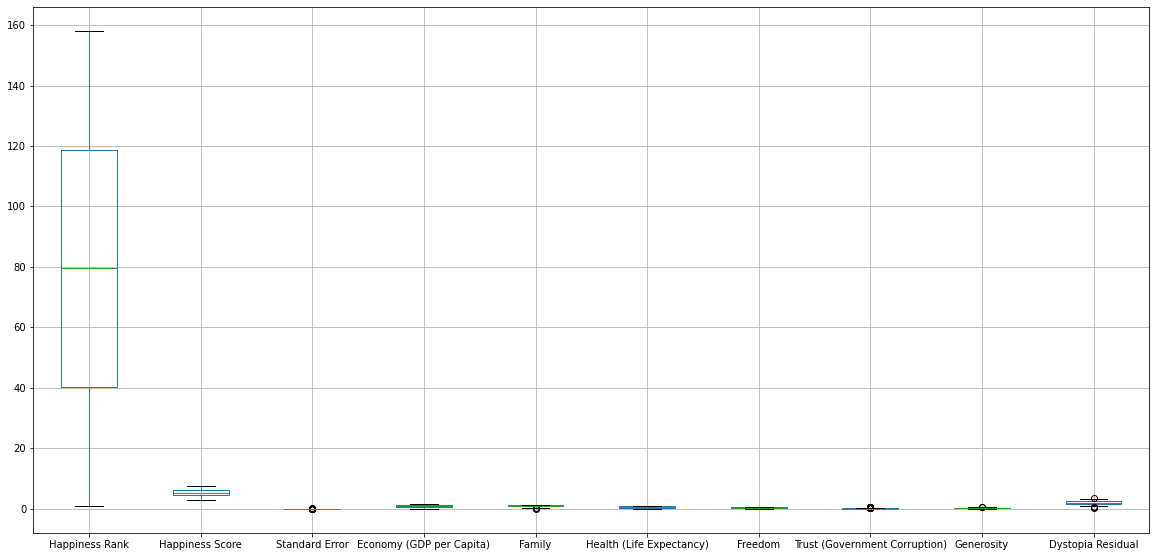

In [46]:
x.iloc[:,0:15].boxplot(figsize=[20,10])
plt.subplots_adjust(bottom=0.15)
plt.show()

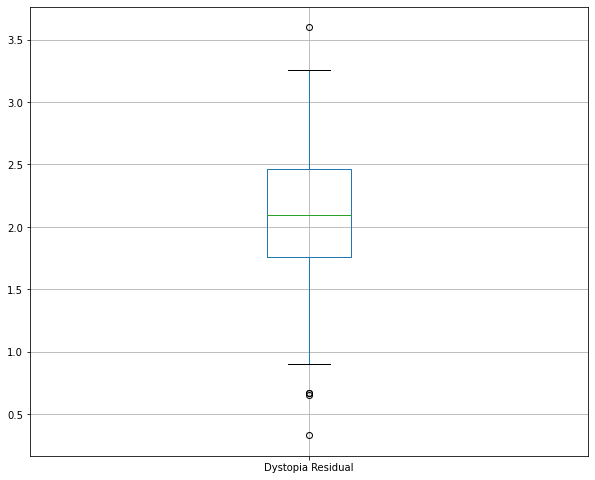

In [47]:
x.iloc[:,10:].boxplot(figsize=[10,8])
plt.subplots_adjust(bottom=0.10)
plt.show()